# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = 'https://raw.githubusercontent.com/DS3001/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv'
abnb = pd.read_csv(url, low_memory=False)
print(abnb.shape)
abnb.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [15]:
price = abnb['Price'] # focusing on variable 'price'
price.unique() # retrieiving unique values from list

price = price.str.replace(",", "") # removing commas in numbers four digits and above to improve searchability
print(price.unique(), '\n')

price = pd.to_numeric(price, errors='coerce') # all values converted to numbers, those incorrectly formatted made NaN
print(price.unique(), '\n')

missing_vals = sum(price.isnull()) # totalling missing values
print(f"Missing values in Price column: {missing_vals}")

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [12]:
abnb['Price'] = price
del price

In order to improve the quality of the data, it was imperative that I cleaned the 'price' variable. I first removed the commas in numbers four digits and above to improve the accessibility of the data. I then ensured that all the values were converted to numbers and that non-conforming values were converted to NaN, meaning 'Not a Number.' Finally, I totalled the missing values, finding it equalled zero, meaning there all values are present.

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [19]:
url = 'https://raw.githubusercontent.com/deancuva/wrangling/main/assignment/data/mn_police_use_of_force.csv'
mn_police = pd.read_csv(url, low_memory=False)
print(mn_police.shape)
mn_police.head()


(12925, 13)


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [30]:
si = mn_police['subject_injury'] # focusing on variable 'subject injury'
print("Unique values for 'subject_injury':", si.unique())
print("\nValue counts (including NaN):")
print(si.value_counts(dropna=False))

missing_count = si.isna().sum()
total = len(si)
prop_missing = missing_count / total
print(f"Number of missing values: {missing_count}")
print(f"Proportion missing: {prop_missing:.2%}")



Unique values for 'subject_injury': [nan 'No' 'Yes']

Value counts (including NaN):
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Number of missing values: 9848
Proportion missing: 76.19%


In [27]:
injury_map = {
    'Yes': 'Yes',
    'YES': 'Yes',
    'No': 'No',
    'NO': 'No',

    'UNKNOWN': None,
    'N/A': None
}

mn_police['subject_injury_clean'] = mn_police['subject_injury'].map(injury_map)
print(mn_police['subject_injury_clean'].value_counts(dropna=False))


subject_injury_clean
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


In [28]:
ctab = pd.crosstab(
    mn_police['subject_injury_clean'],
    mn_police['force_type'],
    dropna=False
)
ctab

pd.crosstab(
    mn_police['subject_injury_clean'],
    mn_police['force_type'],
    normalize='columns'  # or 'index'
)


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,
No,0.0,0.459437,0.761628,1.0,0.428571,0.459459,0.333333,0.043478,0.465839
Yes,1.0,0.540563,0.238372,0.0,0.571429,0.540541,0.666667,0.956522,0.534161


In [29]:
missing_by_force = mn_police.groupby('force_type')['subject_injury_clean'].apply(lambda x: x.isna().mean())
print(missing_by_force.sort_values(ascending=False))


force_type
Less Lethal                    1.000000
Maximal Restraint Technique    1.000000
Chemical Irritant              0.892028
Taser                          0.753634
Bodily Force                   0.747720
Baton                          0.500000
Improvised Weapon              0.500000
Police K9 Bite                 0.402597
Gun Point Display              0.259615
Firearm                        0.000000
Less Lethal Projectile         0.000000
Name: subject_injury_clean, dtype: float64


Through my assessment of the data for 'Subject Injury,' I found that the proportion of values missing was concerning as over 75% of values are missing. It is certainly important to inquire into why so many injuries weren't reported. Additionally, the cross-tabulation shows that injuries are recorded more often for weapons like firearms and tasers, while physical force has more missing values, suggesting inconsistencies in reporting procedures.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [42]:
url = 'https://raw.githubusercontent.com/deancuva/wrangling/main/justice_data%20(1).parquet'
data1 = pd.read_parquet(url, engine = 'pyarrow')
print(data1.shape, '\n')
data1.head()

(22986, 709) 



,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [43]:
def_released = data1['WhetherDefendantWasReleasedPretrial']
print(def_released.unique())
print(def_released.value_counts())

released = def_released.replace(9, np.nan)
print(def_released.value_counts(),'\n')
missing = sum(def_released.isnull())
print(f"Missing values: {missing}")

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

Missing values: 0


In [44]:
data1['released'] = def_released
del def_released

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)


In [ ]:
length = data1`['ImposedSentenceAllChargeInContactEvent']
print(length.unique(),'\n')

In [ ]:
type = data1['SentenceTypeAllChargesAtConvictionInContactEvent']
print(type.value_counts(),'\n')

In [ ]:
length = pd.to_numeric(length, errors = 'coerce')
length_missing = sum(length.isnull())
print(length_missing, '\n')

In [ ]:
length_na = length.isnull()
print(pd.crosstab(length_na, type), '\n')

In [ ]:
length = length.mask(type == 4, 0)
length = length.mask(type == 9, np.nan)

length_na = length.isnull()
print(pd.crosstab(length_na, type), '\n')

length_missing = sum(length.isnull())
print(length_missing, '\n')

In [ ]:
data1['ImposedSentenceAllChargeInContactEvent'] = length
del length, type

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/deancuva/wrangling/refs/heads/main/data/sharks.csv'
sharks = pd.read_csv(url, low_memory=False)
print(sharks.shape)
sharks.head()

(6462, 257)


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns that do not contain data.

In [5]:
sharks_cleaned = sharks.dropna(axis=1, how='all')
sharks_cleaned.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 23
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [13]:

sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce')

sharks_since_1940 = sharks[(sharks['Year'] >= 1940) & (sharks['Year'] <= pd.Timestamp.now().year)]

attacks_per_year = sharks_since_1940.groupby('Year').size()

if len(attacks_per_year) > 1:
    mid_year = 1980
    early_avg = attacks_per_year[attacks_per_year.index <= mid_year].mean()
    recent_avg = attacks_per_year[attacks_per_year.index > mid_year].mean()

    if recent_avg > early_avg:
        trend = "increased"
    elif recent_avg < early_avg:
        trend = "decreased"
    else:
        trend = "remained constant"

    print("Shark attacks have", trend, "since 1940.")
else:
    print("Insufficient data to determine trend.")





Shark attacks have increased since 1940.


The range of values for the variable 'year' spanned from 1500 to 2025.

4. Clean the Age variable and make a histogram of the ages of the victims.

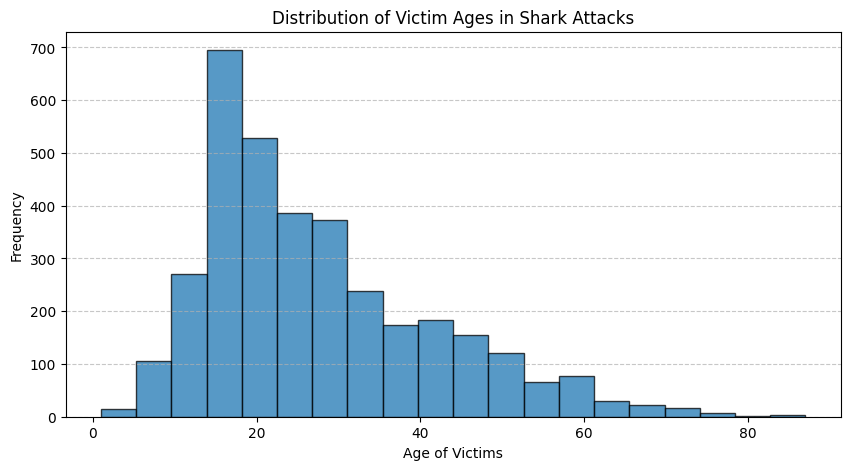

In [15]:
import matplotlib.pyplot as plt

sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')

sharks_df = sharks.dropna(subset=['Age'])

sharks_df = sharks[(sharks_df['Age'] > 0) & (sharks['Age'] < 120)]

plt.figure(figsize=(10, 5))
plt.hist(sharks_df['Age'], bins=20, edgecolor='black', alpha=0.75)
plt.xlabel('Age of Victims')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Shark Attacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


5. What proportion of victims are male?

6. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

7. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

9. What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?